In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from IPython.html.widgets import interact

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [9]:
def mass_plummer(a, M, r, p):
    #a = a*units.kpc
    Mass = M*r**3 / (a**2 + r**2)**(3/2.)
    if p==1:
        plot(r, Mass, lw=3, alpha=0.7)
        xlim(0, r)
    elif p==0:
        return Mass

def rho_plummer(a, M):
    #a = a*units.kpc
    rho = 3*M / (4 *np.pi * a**3) * (1 + r**2/a**2)**(-5/2)
    plot(r, rho)
    return rho

def potential_plummer(a, M):
    #a = a*units.kpc
    phi =  - G*M / np.sqrt(r**2 + a**2)
    plot(r, phi)
    return phi

def vc_plummer(a, M):
    #a = a*units.kpc
    vc = np.sqrt(G*M*( r**2/(r**2 + a**2)**(3/2.)))
    plot(r, vc)
    plt.ylim(0, 4)
    return vc

def plot_random_graph(a, M, r, P, generator):
    g = generator(a, M, r, P)
    plt.show()

In [7]:
#r = linspace(0, 25)
from astropy import constants
G = constants.G
G = G.value

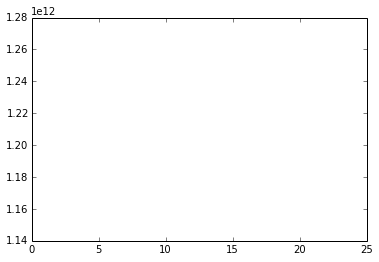

In [10]:
interact(plot_random_graph, a=(2,15), M=(8e11, 2e12),  r=(1, 50), P=1, p=(0.0, 1.0, 0.001),
        generator={'Mass': mass_plummer,
                   r'Density': rho_plummer,
                   r'Potential': potential_plummer,
                   u'Rotation curve': vc_plummer,
                   });

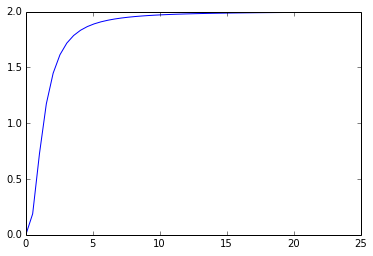

In [19]:
mass_plummer(1, 2, 1)